In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Initial Array was [[1, 2, None], [4, 5, 3], [7, 8, 6]]]
loop: 0
Solution path of Dfs  was  dd
goal achieved solution dd
Solution path of bfs  was  dld
time taken bfs 0.0009999275207519531
time taken dfs 0.0
Initial Array was [[1, None, 2], [4, 5, 3], [7, 8, 6]]]
loop: 1
Solution path of Dfs  was  ddluurddluurddluurddluurddluurulddruulddruulddruulddruulddrruulddluurddluurddluurddluurddluurulddruulddruulddruulddruulddrruulddluurddluurddluurddluurddluurulddruulddruulddruulddruulddrruulddluurddluurddluurddluurddluurulddruulddruulddruulddruulddrruulddluurddluurddluurddluurddluurulddruulddruulddruulddruulddrruulddluurddluurddluurddluurddluurulddruulddruulddruulddruulddrruulddluurddluurddluurddluurddluurulddruulddruulddruulddruulddrr
goal achieved solution rdd
Solution path of bfs  was  dlrdlrddlrududdrd
time taken bfs 0.0019986629486083984
time taken dfs 0.07895016670227051
Initial Array was [[1, 2, None], [4, 5, 3], [7, 8, 6]]]
loop: 2
Solution path of Dfs  was  dd
goal achieved solution dd

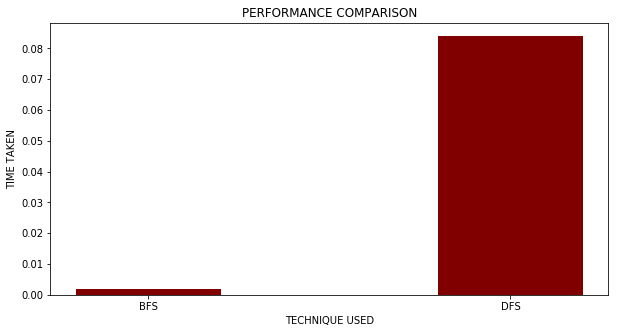

In [2]:
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
import random
import sys
dfst=1.0#to take time
bfst=1.0#to calculate time
BFSTIME=[]#for time array
DFSTIME=[]#for time array
patherbfs=""
patherdfs=""
Initial_Array=[[1,2,3],[4,5,6],[7,8,None]]
goal=[[1,2,3],[4,5,6],[7,8,None]]    
states=[]
#A function to count inversions 
#A pair of tiles form an inversion if the values on tiles are in reverse order of their appearance in goal state. For example, the following instance of 8 puzzle has two inversions, (8, 6) and (8, 7). 

#   1   2   3
#   4   _   5
#   8   6   7 

def getInvCount(arr):
    inv_count = 0
    empty_value = None
    for i in range(0, 9):
        for j in range(i + 1, 9):
            if arr[j] != empty_value and arr[i] != empty_value and arr[i] > arr[j]:
                inv_count += 1
    return inv_count
 
     
# This function returns true
# if given 8 puzzle is solvable.
def isSolvable(puzzle) :
 
    # Count inversions in given 8 puzzle
    inv_count = getInvCount([j for sub in puzzle for j in sub])
 
    # return true if inversion count is even.
    return (inv_count % 2 == 0)


queue=[]
stack=[]
visited=[]
def makerelations(N):
    #This function takes a node and explore it 
   #explore=Attach the up down left right nodes to The node
    
    global states
    #telling function to use global variable named states else the function can make a local variable named states
    if N.list not in states:
        states.append(N.list)
    if(upcheck(N.list)):
        t1=upr(N.list)
        if t1 not in states:
            if(isSolvable(t1)):
                up=True
                N.up=Node(t1,N.path+'u')#path of a node 
                N.up.depth=N.depth +1
    if(downcheck(N.list)):
        t2=downr(N.list)
        if t2 not in states:
            if(isSolvable(t2)):
                down=True
                N.down=Node(t2,N.path+'d')  
                N.down.depth=N.depth +1
    
    if(leftcheck(N.list)):
        t3=leftr(N.list)
        if t3 not in states:
            if(isSolvable(t3)):
                left=True
                N.left=Node(t3,N.path+'l') 
                N.left.depth=N.depth +1
    if(rightcheck(N.list)):
        t4=rightr(N.list)
        if t4 not in states:
            if(isSolvable(t4)):
                right=True
                N.right=Node(t4,N.path+'r')
                N.right.depth=N.depth +1                

    
def BFS(rt):
    global bfst#to store time
    global patherbfs#to store path followed
    global queue
    global goal
    start=time.time()
    queue.append(rt)
    while queue:
        N=queue.pop(0)#poping the first in element
        if(len(N.path)<=1):
            patherbfs=patherbfs+N.path# to extract path from node and add it in path followed
            #like if the node is D and we go to that to find solution so our solution will be string+'d'
        else:
            patherbfs=patherbfs+N.path[-1]
            
        if(N.list==goal):
            print("goal achieved solution",N.path)
            print("Solution path of bfs  was ",patherbfs)       
            end=time.time()      
            bfst=(end-start)            
            return
        
        makerelations(N)
        
        if N.up:
            queue.append(N.up)  
        
        if N.down:
            queue.append(N.down)                
        
        if N.left:
            queue.append(N.left)
        
        if N.right:
            queue.append(N.right)
            
            
def DFS(rt):
    global dfst
    global patherdfs
    global stack
    global goal
    start=time.time()
    stack.append(rt)
    while stack:
        N=stack.pop(-1)# pop the last in element
        if(len(N.path)<=1):
            patherdfs=patherdfs+N.path
            
        else:

            patherdfs=patherdfs+N.path[-1]

        if(N.list==goal):
     
            end=time.time()      
            dfst=(end-start)         
            return
        

        if(time.time()-start>10):
            #10 seconds has happened
            #print ("can't find solution in 10 seconds")
            end=time.time()
            dfst=end-start
            return 
            #as the function can take too much time to find a solution so just to take best Initial States the gets solved in 10 sec
        
        makerelations(N)
        
        if N.right:
            stack.append(N.right) 
        if N.left:
            stack.append(N.left)
        if N.down:
            stack.append(N.down)  
        if N.up:
            stack.append(N.up)            

#return true if up move is possible else false            
def upcheck(arr):
    indexi=0
    indexj=0
    for i in range(3):
        for j in range(3):
            if(arr[i][j] is None):
                indexi=i
                indexj=j
    if indexi<=0:
        return False
    else:
        return True

#return true if down move is possible else false    
def downcheck(arr):
    indexi=0
    indexj=0
    for i in range(3):
        for j in range(3):
            if(arr[i][j] is None):
                indexi=i
                indexj=j
    if indexi>=2:
        return False
    else:
        return True
    
#return true if left move is possible else false    
def leftcheck(arr):
    indexi=0
    indexj=0
    for i in range(3):
        for j in range(3):
            if(arr[i][j] is None):
                indexi=i
                indexj=j
    if indexj<=0:
        return False
    else:
        return True    

#return true if right move is possible else false    
def rightcheck(arr):
    indexi=0
    indexj=0
    for i in range(3):
        for j in range(3):
            if(arr[i][j] is None):
                indexi=i
                indexj=j
    if indexj>=2:
        return False
    else:
        return True

#takes a list apply up move on it and return a new list after applying up move    
def upr(arr):
    arr2=copy.deepcopy(arr)
    indexi=0
    indexj=0
    for i in range(3):
        for j in range(3):
            if(arr[i][j] is None):
                indexi=i
                indexj=j
    temp=arr2[indexi][indexj]
    arr2[indexi][indexj]=arr2[indexi-1][indexj]
    arr2[indexi-1][indexj]=temp
    return arr2
      
    
#takes a list apply down move on it and return a new list after applying down move        
def downr(arr):
    arr2=copy.deepcopy(arr)
    indexi=0
    indexj=0
    for i in range(3):
        for j in range(3):
            if(arr[i][j]==None):
                indexi=i
                indexj=j
    temp=arr2[indexi][indexj]
    arr2[indexi][indexj]=arr2[indexi+1][indexj]
    arr2[indexi+1][indexj]=temp
    return arr2

#takes a list apply right move on it and return a new list after applying right move    
def rightr(arr):
    arr2=copy.deepcopy(arr)
    indexi=0
    indexj=0
    for i in range(3):
        for j in range(3):
            if(arr[i][j]==None):
                indexi=i
                indexj=j
    temp=arr2[indexi][indexj]
    arr2[indexi][indexj]=arr2[indexi][indexj+1]
    arr2[indexi][indexj+1]=temp
    return arr2
    
#takes a list apply left move on it and return a new list after applying up move        
def leftr(arr):
    arr2=copy.deepcopy(arr)
    indexi=0
    indexj=0
    for i in range(3):
        for j in range(3):
            if(arr[i][j]==None):
                indexi=i
                indexj=j
    temp=arr2[indexi][indexj]
    arr2[indexi][indexj]=arr2[indexi][indexj-1]
    arr2[indexi][indexj-1]=temp
    return arr2


#takes a list apply up move on it
def up(arr):
    indexi=0
    indexj=0
    for i in range(3):
        for j in range(3):
            if(arr[i][j] is None):
                indexi=i
                indexj=j
    temp=arr[indexi][indexj]
    arr[indexi][indexj]=arr[indexi-1][indexj]
    arr[indexi-1][indexj]=temp


#takes a  list apply down move on it    
def down(arr): 
    indexi=0
    indexj=0
    for i in range(3):
        for j in range(3):
            if(arr[i][j]==None):
                indexi=i
                indexj=j
    temp=arr[indexi][indexj]
    arr[indexi][indexj]=arr[indexi+1][indexj]
    arr[indexi+1][indexj]=temp
    
#takes a list apply right move on it    
def right(arr):
    indexi=0
    indexj=0
    for i in range(3):
        for j in range(3):
            if(arr[i][j]==None):
                indexi=i
                indexj=j
    temp=arr[indexi][indexj]
    arr[indexi][indexj]=arr[indexi][indexj+1]
    arr[indexi][indexj+1]=temp

#takes a list apply left move on it    
def left(arr):
    indexi=0
    indexj=0
    for i in range(3):
        for j in range(3):
            if(arr[i][j]==None):
                indexi=i
                indexj=j
    temp=arr[indexi][indexj]
    arr[indexi][indexj]=arr[indexi][indexj-1]
    arr[indexi][indexj-1]=temp
    
#a Node class
class Node:
    #constructor
    def __init__(self,l,p,up=None,down=None,left=None,right=None,depth=1):
        self.depth=depth
        self.list=l
        self.path=p
        self.up=up
        self.down=down
        self.left=left
        self.right=right

    def prin(self):
        print(self.list)
        if(self.up):
            self.up.prin()
        else:
            if(self.down):
                self.down.prin()
            else:
                if(self.left):
                    self.left.prin()
                else:
                    if(self.right):
                        self.right.prin()
                    else:
                        return 0 



root=Node(Initial_Array,"")  

#To make an initial array
#it takes goal array And apply some random up down left right moves to make a Initial State
def initial_array():
    global Initial_Array
    for x in range(4):
        j=random.randint(1,4)
        if j==1:
            if(upcheck(Initial_Array)==True):
                up(Initial_Array)
        
        if j==2:
            if(downcheck(Initial_Array)==True):
                down(Initial_Array)
                
        if j==3:
            if(leftcheck(Initial_Array)==True):
                left(Initial_Array)
                
        if j==4:
            if(rightcheck(Initial_Array)==True):
                right(Initial_Array)
    
    if(Initial_Array==goal):
        initial_array()


        
#MAIN FUNCTION
if __name__ == "__main__":
    sys.setrecursionlimit(200000)
    i=0
    while(i <10):
        global dfst,bfst,BFSTIME,DFSTIME,patherbfs,patherdfs,Initial_Array,goal,states,root,queue,visited
        #while(isSolvable(Initial_Array)==False):
        dfst=1.0
        bfst=1.0
        BFSTIME.clear()
        DFSTIME.clear()
        patherbfs=""
        patherdfs=""
        Initial_Array=[[1, 2, 3], [4,5,6], [7,8,None]]
        goal=[[1,2,3],[4,5,6],[7,8,None]]    
        states.clear()
        queue.clear()
        stack.clear()
        visited.clear()
        #Initial_Array=[[1,2,3], [4,5,None], [7,8,6]]        
        initial_array()
        while(isSolvable(Initial_Array)==False):
            initial_array()
        root=Node(Initial_Array,"")

        print("Initial Array was ",Initial_Array,end="\r")
        DFS(root)        
        if(dfst>=10):
            continue 
            
            
        

        print("Initial Array was",Initial_Array)
        print("loop:",i)        
        print("Solution path of Dfs  was ",patherdfs)          
        states.clear()
        BFS(root)#BFS
        BFSTIME.append(bfst)    



        BFSTIME.append(bfst)       
        print("time taken bfs",bfst)
        print("time taken dfs",dfst)
        DFSTIME.append(dfst)
        time.sleep(3)        
        #clear_output(wait=True) 
        Initial_Array=[[1,2,3],[4,5,6],[7,8,None]]
        i=i+1

    averageofbfs=sum(BFSTIME)/len(BFSTIME)
    averageofdfs=sum(DFSTIME)/len(DFSTIME)
    data={'BFS':averageofbfs,'DFS':averageofdfs}#dictionary

    labels=list(data.keys())
    values=list(data.values())
    fig = plt.figure(figsize = (10, 5))
    plt.bar(labels, values, color ='maroon',width = 0.4)
    plt.xlabel("TECHNIQUE USED")
    plt.ylabel("TIME TAKEN")
    plt.title("PERFORMANCE COMPARISON")
    plt.show()    
